In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../our_analyses/dataset_prepared.csv")

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15000 non-null  object 
 1   duration_ms       15000 non-null  int64  
 2   explicit          15000 non-null  bool   
 3   popularity        15000 non-null  int64  
 4   artists           15000 non-null  object 
 5   album_name        15000 non-null  object 
 6   danceability      15000 non-null  float64
 7   energy            15000 non-null  float64
 8   key               15000 non-null  int64  
 9   loudness          15000 non-null  float64
 10  mode              15000 non-null  int64  
 11  speechiness       15000 non-null  float64
 12  acousticness      15000 non-null  float64
 13  instrumentalness  15000 non-null  float64
 14  liveness          15000 non-null  float64
 15  valence           15000 non-null  float64
 16  tempo             15000 non-null  float6

## Feature preprocessing (light)

In [416]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is already loaded
# If not, df = pd.read_csv('path_to_your_dataset.csv')

# Removing specified columns
df = df.drop(['name', 'artists', 'album_name', 'duration_ms', 'key', 'speechiness', 'liveness', 'tempo', 'time_signature', 'n_beats', 'explicit'], axis=1)

genre_groups = {
    'idm': 0, 'iranian': 0, 'study': 0,  # Electronic/Dance
    'black-metal': 1, 'breakbeat': 1, 'techno': 1,  # Metal/Rock
    'brazil': 2, 'forro': 2, 'happy': 2, 'spanish': 2, 'j-idol': 2,  # Country/Folk/Pop
    'afrobeat': 3, 'chicago-house': 3, 'industrial': 3, 'j-dance': 3,  # World/Commercial Pop
    'bluegrass': 4, 'disney': 4, 'indian': 4, 'mandopop': 4, 'sleep': 4  # Other
}


# Mapping genres to genre groups and encoding 'explicit' column
df['genre_group'] = df['genre'].map(genre_groups).astype(int)
# le = LabelEncoder()
# df['explicit'] = le.fit_transform(df['explicit'])

# Dropping the 'genre' column
df.drop(['genre'], axis=1, inplace=True)

# Binning numerical columns and adding descriptive suffixes
bin_columns = ["danceability", "valence", "instrumentalness", "acousticness", "loudness", "energy", "popularity"]
bin_suffixes = ["_Danceability", "_Valence", "_Instrumentalness", "_Acousticness", "_Loudness", "_Energy", "_Popularity"]

for col, suffix in zip(bin_columns, bin_suffixes):
    try:
        df[col + "_Bin"] = pd.qcut(df[col], 4, duplicates='drop').astype(str) + suffix
    except ValueError as e:
        print(f"Error during binning {col}: {e}")

# Dropping original numerical columns
df.drop(bin_columns, axis=1, inplace=True)

# explcit_dict = {0: "Explicit", 1: "Not explicit"}
# df["explicit"] = df["explicit"].map(explcit_dict)

genre_dict = {0:' Electronic/Dance', 1:'Metal/Rock', 2:'Country/Folk/Pop', 3:'World/Commercial Pop', 4:'Other'}
df["genre_group"] = df["genre_group"].map(genre_dict)


genre_dict = {0:'mode_0', 1: 'mode_1'}
df["mode"] = df["mode"].map(genre_dict)
# Displaying the first few rows of the modified dataframe
df.head()


,mode,genre_group,danceability_Bin,valence_Bin,instrumentalness_Bin,acousticness_Bin,loudness_Bin,energy_Bin,popularity_Bin
0,mode_1,World/Commercial Pop,"(-0.001, 0.441]_Danceability","(0.196, 0.416]_Valence","(-0.001, 0.00313]_Instrumentalness","(0.155, 0.573]_Acousticness","(-7.303, -5.101]_Loudness","(0.48, 0.709]_Energy","(42.0, 94.0]_Popularity"
1,mode_1,World/Commercial Pop,"(0.58, 0.695]_Danceability","(0.664, 0.995]_Valence","(0.744, 1.0]_Instrumentalness","(0.155, 0.573]_Acousticness","(-7.303, -5.101]_Loudness","(0.709, 0.884]_Energy","(42.0, 94.0]_Popularity"
2,mode_1,World/Commercial Pop,"(0.58, 0.695]_Danceability","(0.664, 0.995]_Valence","(0.00313, 0.744]_Instrumentalness","(0.155, 0.573]_Acousticness","(-10.636, -7.303]_Loudness","(0.709, 0.884]_Energy","(14.0, 24.0]_Popularity"
3,mode_1,World/Commercial Pop,"(0.695, 0.98]_Danceability","(0.664, 0.995]_Valence","(-0.001, 0.00313]_Instrumentalness","(0.155, 0.573]_Acousticness","(-7.303, -5.101]_Loudness","(0.709, 0.884]_Energy","(14.0, 24.0]_Popularity"
4,mode_1,World/Commercial Pop,"(0.695, 0.98]_Danceability","(0.416, 0.664]_Valence","(-0.001, 0.00313]_Instrumentalness","(0.573, 0.996]_Acousticness","(-10.636, -7.303]_Loudness","(-0.001, 0.48]_Energy","(14.0, 24.0]_Popularity"


In [417]:
df['instrumentalness_Bin'].unique()

array(['(-0.001, 0.00313]_Instrumentalness',
       '(0.744, 1.0]_Instrumentalness',
       '(0.00313, 0.744]_Instrumentalness'], dtype=object)

In [418]:
# import pandas as pd
# from fim import fpgrowth

# # Load and preprocess your dataset (assuming df is the dataset)
# # ... [existing preprocessing code] ...

# # Transforming the dataframe into a list of transactions
# transactions = df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

# # Define ranges for support and minimum pattern length
# support_values = range(5, 50, 5)  # from 5% to 95%, in steps of 5%
# min_pattern_lengths = range(1, 3)  # from 1 to 4

# # Dictionary to store results
# results = {}

# for support in support_values:
#     for min_len in min_pattern_lengths:
#         # Running FP-growth with given support and minimum pattern length
#         itemsets = fpgrowth(transactions, target='s', supp=support, zmin=min_len, report='aS')
#         key = f"Support: {support}%, Min Length: {min_len}"
#         results[key] = itemsets

# # You can now analyze 'results' to understand the frequent patterns for different parameters
# print(results)

# FP-growth

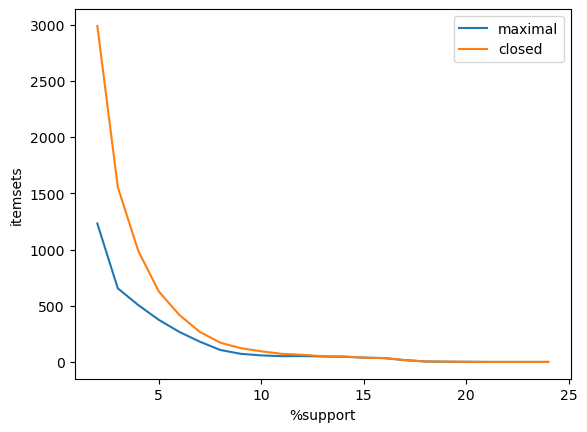

In [419]:
from fim import fpgrowth

X = df.values.tolist()

supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = fpgrowth(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = fpgrowth(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()


In [420]:
# pd.set_option('display.max_rows', None)


# supp = 8  # 20%
# zmin = 2  # minimum number of items per item set

# itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
# pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

In [426]:

supp = 15  # 20%
zmin = 2  # minimum number of items per item set


# genre_dict = {0:' Electronic/Dance', 1:'Metal/Rock', 2:'Country/Folk/Pop', 3:'World/Commercial Pop', 4:'Other'}

conf = 70

rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
18,"(-49.532, -10.636]_Loudness","((0.573, 0.996]_Acousticness, (-0.001, 0.48]_Energy)",1949,12.993333,0.761328,3.045313
19,"(0.573, 0.996]_Acousticness","((-49.532, -10.636]_Loudness, (-0.001, 0.48]_Energy)",1949,12.993333,0.747603,2.996003
8,"(-0.001, 0.48]_Energy","((-49.532, -10.636]_Loudness, mode_1)",1896,12.640000,0.722286,2.882226
12,"(-0.001, 0.00313]_Instrumentalness","(Country/Folk/Pop, mode_1)",2135,14.233333,0.814885,1.629337
13,"(-0.001, 0.00313]_Instrumentalness","(Country/Folk/Pop,)",3007,20.046667,0.801867,1.603306
21,"(-0.001, 0.00313]_Instrumentalness","((42.0, 94.0]_Popularity, mode_1)",1870,12.466667,0.722287,1.444188
22,"(-0.001, 0.00313]_Instrumentalness","((42.0, 94.0]_Popularity,)",2619,17.460000,0.706883,1.413388
10,mode_1,"(Other, (-0.001, 0.00313]_Instrumentalness)",1748,11.653333,0.776199,1.146189
9,mode_1,"(Other,)",2879,19.193333,0.767733,1.133688
3,mode_1,"((0.441, 0.58]_Danceability, (-0.001, 0.00313]_Instrumentalness)",1693,11.286667,0.744503,1.099384
